In [102]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]



In [103]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [104]:
y_score

array([[-0.76301132, -0.36482547,  0.12386354],
       [-0.20224493, -0.63144366, -0.16612302],
       [ 0.11801481, -0.80263073, -0.32055874],
       [-0.90780855, -0.12395478,  0.02199789],
       [-0.01116192, -0.27913475, -0.71889214],
       [-0.6048727 , -0.34730509, -0.05859016],
       [ 0.02283491, -0.24506467, -0.79111998],
       [-0.61076876,  0.18264917, -0.57199363],
       [-0.37572754, -0.24059516, -0.38933694],
       [-0.47017411, -0.25745136, -0.27510839],
       [-0.42224234, -0.30270719, -0.27995197],
       [-0.3355867 , -0.7030665 ,  0.02530178],
       [-0.22723929, -0.64062258, -0.13456902],
       [-0.07856729, -0.46354017, -0.45918364],
       [-0.53383361, -0.2653183 , -0.20023832],
       [ 0.12163662, -0.56706353, -0.56980985],
       [-0.71356947, -0.04226738, -0.24297128],
       [-0.55111511, -0.13784913, -0.31370595],
       [ 0.37991331, -0.99673302, -0.39090964],
       [-0.11107635, -0.91349462,  0.03129167],
       [-0.70713712, -0.06436533, -0.214

In [107]:
type(y_score[0][0])

numpy.float64

In [133]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [143]:
y_test[:, 0]

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0])

In [144]:
y_score[:, 0]

array([-0.76301132, -0.20224493,  0.11801481, -0.90780855, -0.01116192,
       -0.6048727 ,  0.02283491, -0.61076876, -0.37572754, -0.47017411,
       -0.42224234, -0.3355867 , -0.22723929, -0.07856729, -0.53383361,
        0.12163662, -0.71356947, -0.55111511,  0.37991331, -0.11107635,
       -0.70713712, -0.02392675, -0.25045747,  0.12675547, -0.68210402,
       -0.08001795, -0.03259341, -0.04953425, -0.12974835, -0.19299299,
       -0.3619768 , -0.22818639, -0.06196433, -0.52455061, -0.40026409,
       -0.35056585, -0.05770139, -1.11907501,  0.19599366, -0.04299172,
       -0.48108269,  0.1741885 , -0.41416456, -0.01053513,  0.01645355,
       -0.11932181, -0.70817199, -0.77303401, -0.61489613, -0.96334774,
       -0.31037723, -0.31952657, -0.35306417,  0.12127427, -0.6643231 ,
       -0.55149778, -0.55695146, -0.41111447, -0.49463336,  0.06910059,
       -0.23036784,  0.30342285,  0.17642852, -0.1906155 , -0.42910413,
       -0.67759563, -0.32958811, -0.97119543,  0.02088168, -0.08

In [116]:
roc_curve(y_test[:, 0], y_score[:, 0])

(array([0.        , 0.        , 0.        , 0.01851852, 0.01851852,
        0.03703704, 0.03703704, 0.05555556, 0.05555556, 0.07407407,
        0.07407407, 0.09259259, 0.09259259, 0.12962963, 0.12962963,
        0.14814815, 0.14814815, 0.2037037 , 0.2037037 , 0.27777778,
        0.27777778, 1.        ]),
 array([0.        , 0.04761905, 0.14285714, 0.14285714, 0.19047619,
        0.19047619, 0.33333333, 0.33333333, 0.38095238, 0.38095238,
        0.61904762, 0.61904762, 0.66666667, 0.66666667, 0.76190476,
        0.76190476, 0.9047619 , 0.9047619 , 0.95238095, 0.95238095,
        1.        , 1.        ]),
 array([ 1.37991331,  0.37991331,  0.24966175,  0.19599366,  0.18869727,
         0.17642852,  0.12163662,  0.12127427,  0.11801481,  0.06910059,
        -0.01116192, -0.02392675, -0.03259341, -0.04953425, -0.06196433,
        -0.07856729, -0.11107635, -0.1906155 , -0.19299299, -0.23036784,
        -0.25045747, -1.11907501]))

In [117]:
type(y_test[0][0])

numpy.int32

In [46]:
print(fpr[0])
print()
print(tpr[0])
print()

print(auc(fpr[0], tpr[0]))

[0.         0.         0.         0.01851852 0.01851852 0.03703704
 0.03703704 0.05555556 0.05555556 0.07407407 0.07407407 0.09259259
 0.09259259 0.12962963 0.12962963 0.14814815 0.14814815 0.2037037
 0.2037037  0.27777778 0.27777778 1.        ]

[0.         0.04761905 0.14285714 0.14285714 0.19047619 0.19047619
 0.33333333 0.33333333 0.38095238 0.38095238 0.61904762 0.61904762
 0.66666667 0.66666667 0.76190476 0.76190476 0.9047619  0.9047619
 0.95238095 0.95238095 1.         1.        ]

0.9126984126984127


In [47]:
fpr

{0: array([0.        , 0.        , 0.        , 0.01851852, 0.01851852,
        0.03703704, 0.03703704, 0.05555556, 0.05555556, 0.07407407,
        0.07407407, 0.09259259, 0.09259259, 0.12962963, 0.12962963,
        0.14814815, 0.14814815, 0.2037037 , 0.2037037 , 0.27777778,
        0.27777778, 1.        ]),
 1: array([0.        , 0.        , 0.        , 0.02222222, 0.02222222,
        0.11111111, 0.11111111, 0.17777778, 0.17777778, 0.2       ,
        0.2       , 0.24444444, 0.24444444, 0.26666667, 0.26666667,
        0.37777778, 0.37777778, 0.42222222, 0.42222222, 0.48888889,
        0.48888889, 0.55555556, 0.55555556, 0.62222222, 0.62222222,
        0.64444444, 0.64444444, 0.66666667, 0.66666667, 0.73333333,
        0.73333333, 0.75555556, 0.75555556, 0.88888889, 0.88888889,
        1.        ]),
 2: array([0.        , 0.        , 0.        , 0.01960784, 0.01960784,
        0.07843137, 0.07843137, 0.09803922, 0.09803922, 0.11764706,
        0.11764706, 0.1372549 , 0.1372549 , 0.15686

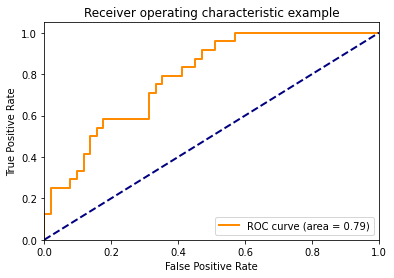

In [48]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

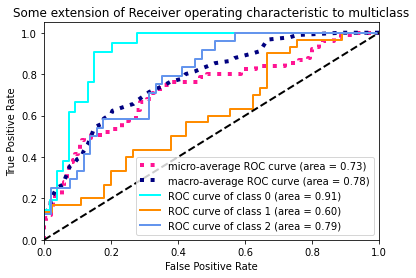

In [7]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [145]:
import csv
import re
import math
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..") # adds higher directory to python modules path

from LoaderPACK.Loader import testload_5min
from LoaderPACK.Accuarcy_finder import Accuarcy_find_tester
import torch
import matplotlib.pyplot as plt

device = "cpu"

if device == "cpu":
    fl = torch.FloatTensor
    it = torch.LongTensor
else:
    fl = torch.cuda.FloatTensor
    it = torch.cuda.LongTensor

    # "C:/Users/Marc/Desktop/data/val_model_data"
    # "C:/Users/Marc/Desktop/data/train_model_data"

load_file = testload_5min(path = "C:/Users/Marc/Desktop/data/val_model_data",
                          series_dict = 'val_series_length.pickle',
                          size = (28, 22, 549200), #size = (195, 22, 2060000),
                          device = device) # total val series = 2642
                                           # total train series = 18497

loader = torch.utils.data.DataLoader(load_file,
                                     batch_size=1,
                                     shuffle=False,
                                     num_workers=0)

it = iter(loader)

ind, tar, meta = next(it)

data = (ind.view(-1) - ind.view(-1).mean())/ind.view(-1).std()

x = data.view(1, -1).transpose(1, 0).numpy()

target = tar.view(-1)

tar = torch.stack((~target.bool(), target)).view(2, -1)
target = tar.transpose(1, 0)
y = target.numpy()

In [123]:
from LoaderPACK.LSTM_net import LSTM_net
from LoaderPACK.naive_models import thenos
from LoaderPACK.Loader import testload_5min
from LoaderPACK.tester import val_tester
from LoaderPACK.Unet import Unet
from LoaderPACK.Accuarcy_finder import Accuarcy_find
from LoaderPACK.Accuarcy_upload import Accuarcy_upload
from multiprocessing import Process

batch_size = 1

model = LSTM_net(batch_size=batch_size, device=device).to(device)
x = torch.load(f"C:/Users/Marc/Desktop/network/network_LSTM-510.pt")
x = torch.load(r"C:\Users\Marc\Desktop\network\networks_515\network_LSTM-loss-epk-94.pt")
model.load_state_dict(x)
model.to(device)

LSTM_net(
  (lstm): LSTM(1, 5, proj_size=1, num_layers=2, batch_first=True, bidirectional=True)
  (soft): Softmax(dim=1)
)

In [124]:
with torch.no_grad():
    y_pred = model(ind)

In [125]:
y_pred.shape

torch.Size([1, 2, 60000])

In [126]:
pred = y_pred.view(2, -1).transpose(1, 0).numpy()

In [127]:
pred.shape

(60000, 2)

In [128]:
pred = np.float64(pred)

In [129]:
pred

array([[4.15919785e-04, 9.99584138e-01],
       [2.21436872e-04, 9.99778569e-01],
       [1.95816348e-04, 9.99804199e-01],
       ...,
       [9.99725163e-01, 2.74768070e-04],
       [9.99422789e-01, 5.77222614e-04],
       [9.96798098e-01, 3.20196315e-03]])

In [146]:
y = np.int32(y)

In [147]:
y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [149]:
y[:, 0]

array([0, 0, 0, ..., 1, 1, 1])

In [157]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

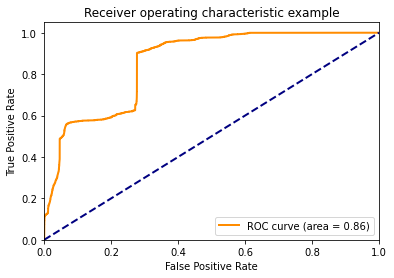

In [189]:
plt.figure()
lw = 2
plt.plot(
    fpr[1],
    tpr[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

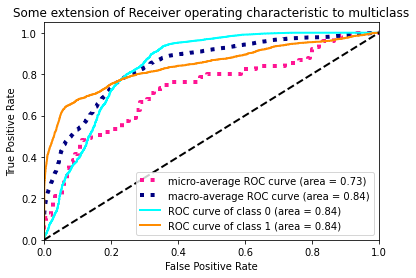

In [254]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(2), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [52]:
x_train = x[:9000]
y_train = y[:9000]

x_test = x[59000:]
y_test = y[59000:]

In [53]:
y_test.shape

(1000, 2)

In [54]:

classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)

y_score = classifier.fit(x_train, y_train).decision_function(x_test)

In [55]:
y_score

array([[ 1.00000042, -1.00000198],
       [ 1.0000004 , -1.00000195],
       [ 1.00000039, -1.00000194],
       ...,
       [ 1.00000073, -1.00000244],
       [ 1.00000073, -1.00000244],
       [ 1.00000071, -1.00000242]])

In [56]:
y_score.shape

(1000, 2)

In [57]:
y_test.shape

(1000, 2)

In [58]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

C:\Users\Marc\anaconda3\envs\deep\lib\site-packages\sklearn\metrics\_ranking.py:990: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
C:\Users\Marc\anaconda3\envs\deep\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [61]:
roc_curve(y_test[:, 1], y_score[:, 1])

C:\Users\Marc\anaconda3\envs\deep\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


(array([0.   , 0.001, 1.   ]),
 array([nan, nan, nan]),
 array([-1.41834515e-06, -1.00000142e+00, -1.00000265e+00]))

In [68]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

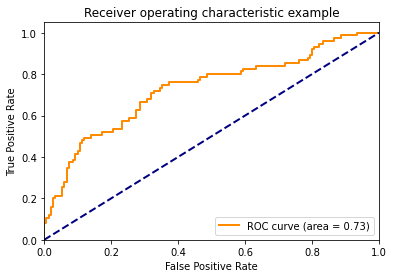

In [179]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X[:, 0].reshape(-1, 1), y)


In [205]:
#X[:, 0].reshape(-1, 1)

In [185]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [188]:
clf.predict([[X[0, 2]]])



array([0])

In [173]:
X[:, 0].reshape(1, -1)

array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]])

In [193]:
y.shape

(150,)

In [447]:
import csv
import re
import math
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..") # adds higher directory to python modules path

from LoaderPACK.Loader import testload_5min
from LoaderPACK.Accuarcy_finder import Accuarcy_find_tester
import torch
import matplotlib.pyplot as plt

device = "cpu"

if device == "cpu":
    fl = torch.FloatTensor
    it = torch.LongTensor
else:
    fl = torch.cuda.FloatTensor
    it = torch.cuda.LongTensor

    # "C:/Users/Marc/Desktop/data/val_model_data"
    # "C:/Users/Marc/Desktop/data/train_model_data"

load_file = testload_5min(path = "C:/Users/Marc/Desktop/data/val_model_data",
                          series_dict = 'val_series_length.pickle',
                          size = (28, 22, 549200), #size = (195, 22, 2060000),
                          device = device) # total val series = 2642
                                           # total train series = 18497

loader = torch.utils.data.DataLoader(load_file,
                                     batch_size=1,
                                     shuffle=False,
                                     num_workers=0)

it = iter(loader)

ind, tar, meta = next(it)

target = torch.zeros(1)

while target.sum() == 0:

    data = (ind.view(-1).abs()/200)
    data = data.view(-1,1).numpy()

    target = np.int32(tar.view(-1, 1).numpy())


In [448]:
print(target.shape)

(60000, 1)


In [449]:
data.shape

(60000, 1)

In [450]:
print(target.sum())

2000


In [451]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
i = 0
fpr[i], tpr[i], _ = roc_curve(target, data)
roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], thrs = roc_curve(target.ravel(), data.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

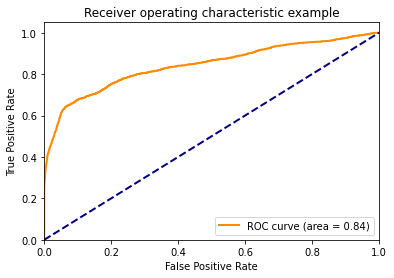

In [452]:
plt.figure()
lw = 2
plt.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[0],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [453]:
print(sklearn.metrics.roc_auc_score(target, pred, average = "micro"))
print(sklearn.metrics.roc_auc_score(target, pred, average = "macro"))
print(sklearn.metrics.roc_auc_score(target, pred, average = "weighted"))

ValueError: Found input variables with inconsistent numbers of samples: [60000, 569]

In [411]:
roc_auc[0]

0.8422129698275862

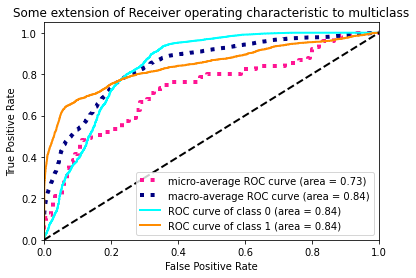

In [319]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(2), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [287]:
all_fpr

array([0.00000000e+00, 1.72413793e-05, 3.44827586e-05, ...,
       9.96551724e-01, 9.99189655e-01, 1.00000000e+00])

In [288]:
import sklearn

In [304]:
print(sklearn.metrics.roc_auc_score(y_test.ravel(), y_score.ravel(), average = "weighted"))

0.7277333333333333


In [334]:
print(sklearn.metrics.roc_auc_score(y_test, y_score, average = "micro"))
print(sklearn.metrics.roc_auc_score(y_test, y_score, average = "macro"))
print(sklearn.metrics.roc_auc_score(y_test, y_score, average = "weighted"))

0.7277333333333333
0.7677222740948232
0.74880174291939


In [332]:
print(sklearn.metrics.roc_auc_score(y_test[:, 0], y_score[:, 0], average = "weighted"))

0.9126984126984127


In [335]:
auc(fpr["micro"], tpr["micro"])

0.7277333333333333

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X, y = load_breast_cancer(return_X_y=True)

kk = 4

clf = LogisticRegression(solver="liblinear", random_state=0).fit(X[:, kk].reshape(-1, 1), y)
pred =clf.predict_proba(X[:, kk].reshape(-1, 1))[:, 1]
roc_auc_score(y, pred)



0.7220416468474182

In [6]:
pred

array([0.61962006, 0.62980307, 0.62229288, 0.6122634 , 0.6251095 ,
       0.61675698, 0.62682259, 0.61946798, 0.61690948, 0.61955923,
       0.63060903, 0.62607671, 0.62598608, 0.63002267, 0.62123071,
       0.62098776, 0.6256023 , 0.62004577, 0.6257111 , 0.62586824,
       0.62292962, 0.62447422, 0.62299024, 0.62692823, 0.6215343 ,
       0.61955923, 0.62356593, 0.62689202, 0.62271742, 0.62566274,
       0.62326298, 0.62189849, 0.61922459, 0.62700972, 0.62398991,
       0.62637876, 0.62573528, 0.62827035, 0.62705197, 0.62471628,
       0.63074128, 0.61831137, 0.62797495, 0.62395963, 0.62606463,
       0.62220188, 0.62942389, 0.62041052, 0.62426236, 0.62896627,
       0.62931252, 0.63217375, 0.63044368, 0.62071437, 0.62805032,
       0.62663844, 0.62359622, 0.6210485 , 0.63104779, 0.62594982,
       0.62113961, 0.61782398, 0.62371737, 0.63206572, 0.62150395,
       0.61998497, 0.62386879, 0.6308104 , 0.62320238, 0.6257111 ,
       0.62819199, 0.62585615, 0.62305085, 0.62498852, 0.62770

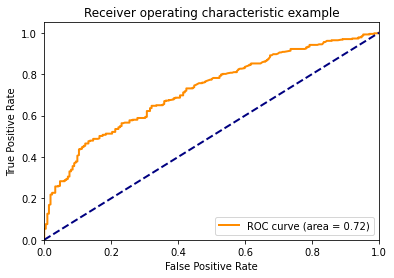

0.7277333333333333
0.7220416468474182


In [382]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
i = 0
fpr[i], tpr[i], _ = roc_curve(y.reshape(-1, 1), pred.reshape(-1, 1))
roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], thrs = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[0],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

print(roc_auc["micro"])
print(roc_auc[0])